In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Generating data

In [17]:
sample_size = int(1e3);
x = np.linspace(0,1, num=sample_size);
y = np.sin(2*np.pi*x)
data = np.sin(2*np.pi*x) + np.random.normal(size=sample_size,scale=0.35);
#data = np.sin(2*np.pi*x) + (np.e**x)*1.7 + np.random.normal(size=sample_size,scale=0.35);

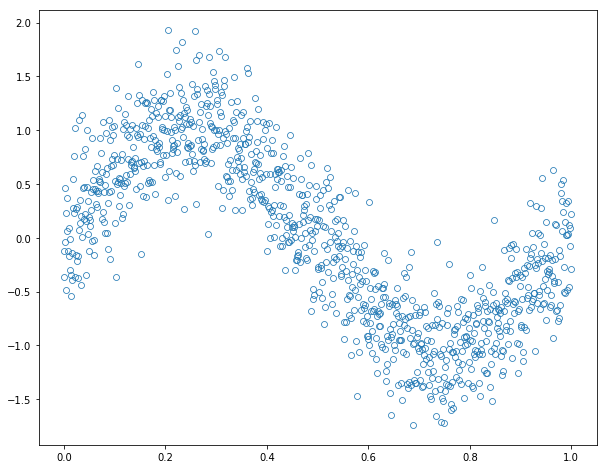

In [18]:
plt.figure(figsize=(10,8))
plt.plot(x,data,'o',markerfacecolor='none',markeredgewidth=0.75);
#plt.show();

#### Splitting data

In [14]:
data

array([-1.22398667e-01, -3.62164849e-01,  4.61375454e-01, -4.12645792e-02,
        2.27335566e-01, -4.84799017e-01,  6.53038519e-02,  3.65456881e-01,
       -1.22149506e-01,  9.03368793e-02, -1.65612688e-01, -8.48780874e-03,
       -2.98498233e-01, -3.48020117e-01, -5.41561650e-01, -1.45620333e-01,
       -3.92992266e-01,  5.45056974e-01,  2.77315838e-01,  2.33638385e-01,
        7.58448152e-01, -3.62878510e-01,  1.02108412e+00,  2.65715161e-01,
       -1.60201008e-01, -2.14276272e-01,  2.84581523e-01, -3.76531738e-01,
       -1.73067916e-01,  1.09878852e+00,  6.82564050e-02,  1.37007796e-01,
        3.51443013e-01,  2.04493001e-01, -4.40436399e-01,  5.65401562e-03,
        1.14118522e+00,  4.62873404e-01,  7.58796052e-01,  1.77161441e-01,
        4.71709457e-01,  8.21147923e-01,  2.25405371e-01,  1.56534328e-01,
       -3.48538717e-01,  4.75444125e-01,  1.00285193e+00,  3.42339858e-01,
        3.50082643e-02,  1.94779678e-01, -1.24572149e-01,  1.07573353e-01,
        1.67892848e-01,  

In [20]:
obs = np.zeros((10,1000));
obs[:] = np.nan

plt.figure(figsize=(5,4))

for i in range(10):
    np.random.seed(i)
    for k in range(100):
        r = np.random.randint(0,1000)
        if r not in obs[i]: obs[i].append(r)
    rdn_index = np.random.randint(0,1000,100)
    print(rdn_index)
    #print(rdn_index)

    for j in rdn_index:
        obs[i][j] = data[j]
        print(obs[i])
        
    plt.plot(x,obs[i],'o',markerfacecolor='none',markeredgewidth=1)


AttributeError: 'numpy.ndarray' object has no attribute 'append'

<Figure size 360x288 with 0 Axes>

In [6]:
df = pd.DataFrame(obs)
df.isnull().sum(axis=1)

0    902
1    905
2    906
3    905
4    903
5    908
6    906
7    904
8    905
9    909
dtype: int64

#### Defining the function

Now, we'll see the problem of $ y(\boldsymbol{x},\boldsymbol{w}) = w_0 + w_1 x^1 + ... + w_D x^D $ and make some changes. Let's choose some arbitrary function class $ \phi(x) $ and then, our previous relation becomes $ y(\boldsymbol{x},\boldsymbol{\phi}) = w_0 + w_1 \phi_1 + ... + w_D \phi_D $, such that $ \phi_i $ are apparently linearly independent. So, in this example we'll choose the function $$ \phi_i = \exp \left( -\frac{(x-\mu_i)^2}{s^2} \right) $$

Defining the model matrix

<font color="red">Missing to define the covariance matrix $\sum ^{-1}$ and replace it in $ s $</font>

In [7]:
M = 10

def f_phi(x,mu,s=1):
    aux = x-mu
    return np.e**(-(np.dot(aux,aux.T)) / s**2)

In [8]:
N = 3

phi = np.zeros((M,N))

In [9]:
for i in range(M):
    for j in range(N):
        phi[i][j] = f_phi(df[i:i+1][~np.isnan(df)],j)

print(phi)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [10]:
for i in range(10):
    obs[i]
    x = obs[i][~np.isnan(obs[i])]
    print(x.shape)

(98,)
(95,)
(94,)
(95,)
(97,)
(92,)
(94,)
(96,)
(95,)
(91,)
